# Análisis Exploratorio Integral - Índice Delictivo en Hermosillo

## Descripción General

Este notebook realiza un **análisis exploratorio completo** del dataset unificado de incidentes delictivos en Hermosillo. Se incluyen múltiples técnicas de análisis estadístico y visualización para extraer insights relevantes.

### Secciones Principales:

| Sección | Objetivo |
|---------|----------|
| Carga de Datos | Importar librerías y cargar dataset unificado |
| Datos Faltantes | Análisis de completitud y valores nulos |
| Hallazgos Procesados | Patrones temporales y geográficos clave |
| Detección de Anomalías | Métodos estadísticos (Z-Score, IQR) |
| Análisis PCA | Reducción dimensional y varianza explicada |
| Conclusiones | Resumen ejecutivo y recomendaciones |

---

## 1. Configuración Inicial: Importar Librerías y Cargar Datos

Esta sección configura el entorno de análisis, suprime advertencias innecesarias y carga los datos del dataset unificado.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
import os

# Suprimir todos los warnings
warnings.filterwarnings('ignore')
os.environ['PYTHONWARNINGS'] = 'ignore'

# Suprimir warnings específicos de librerías
import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)
logging.getLogger('seaborn').setLevel(logging.ERROR)
logging.getLogger('sklearn').setLevel(logging.ERROR)

# ===== CONFIGURACIÓN DE ESTILOS PROFESIONALES =====
# Paletas de colores
sns.set_palette("husl")
sns.set_theme(style="whitegrid")

# Tema personalizado
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context("notebook", font_scale=1.1)

# Cargar datos
project_root = Path.cwd().parent
data_path = project_root / 'data' / 'processed' / 'unificado' / 'poligonos_unificados_completo.csv'

print(f"Cargando datos desde: {data_path}")
df = pd.read_csv(data_path)

print(f"\n✓ Dataset cargado exitosamente")
print(f"  Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"\nPrimeras filas:")
df.head()

Cargando datos desde: c:\Users\joel_\indice-delictivo-hermosillo\data\processed\unificado\poligonos_unificados_completo.csv

✓ Dataset cargado exitosamente
  Dimensiones: 700 filas × 30 columnas

Primeras filas:


,cve_ent,cve_mun,cve_loc,nom_loc,CVE_COL,COLONIA,CP,otros_cp,total_incidentes,incidentes_alta,...,viviendas_totales,escolaridad_años_prom,pctj_menores18,pctj_hombres,pctj_mujeres,tasa_incidentes_per_1k,tasa_alta_severidad_per_1k,score_severidad,area_km2,densidad_poblacional
0,26,30,1,Hermosillo,2603000016735,ALTA FIRENZE NORTE RESIDENCIAL,83104.0,NaN,1,1,...,68.0,14.9,28.6%,49.4%,50.6%,12.987013,12.987013,3.000000,0.037555,2050.340413
1,26,30,1,Hermosillo,2603000011785,JORGE VALDEZ MUÃOZ,83104.0,NaN,3066,1404,...,366.0,9.4,35.7%,49.9%,50.1%,2836.262720,1298.797410,2.199609,0.108585,9955.346547
2,26,30,1,Hermosillo,2603000016335,VILLA VERDE CERRADA SAN VICENTE,83118.0,NaN,0,0,...,261.0,9.5,40.4%,52.4%,47.6%,0.000000,0.000000,0.000000,0.060584,11801.826946
3,26,30,1,Hermosillo,2603000011480,VILLA VENTURA,83159.0,NaN,0,0,...,86.0,14.2,21.7%,46.5%,53.5%,0.000000,0.000000,0.000000,0.017695,6781.506720
4,26,30,1,Hermosillo,2603000011663,NUEVO HERMOSILLO,83296.0,NaN,43761,15415,...,4102.0,10.7,29.4%,49.1%,50.9%,3465.119962,1220.603373,2.022691,1.266794,9969.263119


### 1.1 Información General del Dataset

Examen preliminar de la estructura, tipos de datos y estadísticas descriptivas.

In [30]:
# Información general
print("="*70)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*70)
print(f"\nTipo de datos:\n")
print(df.dtypes)
print(f"\nEstadísticas descriptivas:\n")
df.describe().T

INFORMACIÓN GENERAL DEL DATASET

Tipo de datos:

cve_ent                         int64
cve_mun                         int64
cve_loc                         int64
nom_loc                        object
CVE_COL                         int64
COLONIA                        object
CP                            float64
otros_cp                      float64
total_incidentes                int64
incidentes_alta                 int64
incidentes_media                int64
incidentes_baja                 int64
categorias_dict                object
partes_dia_dict                object
incidentes_fin_semana           int64
incidentes_quincena             int64
dias_semana_dict               object
fecha_inicio                   object
fecha_fin                      object
poblacion_total               float64
viviendas_totales             float64
escolaridad_años_prom         float64
pctj_menores18                 object
pctj_hombres                   object
pctj_mujeres                   object
t

,count,mean,std,min,25%,50%,75%,max
cve_ent,700.0,2.600000e+01,0.000000e+00,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01
cve_mun,700.0,3.000000e+01,0.000000e+00,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
cve_loc,700.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
CVE_COL,700.0,2.599285e+12,9.828577e+10,2.603000e+09,2.603000e+12,2.603000e+12,2.603000e+12,2.603000e+12
CP,700.0,8.317611e+04,7.703609e+01,8.300000e+04,8.311400e+04,8.315900e+04,8.324525e+04,8.334400e+04
otros_cp,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_incidentes,700.0,3.150076e+03,8.737956e+03,0.000000e+00,1.000000e+00,4.610000e+02,2.741250e+03,1.579690e+05
incidentes_alta,700.0,1.101990e+03,2.873422e+03,0.000000e+00,0.000000e+00,1.565000e+02,8.732500e+02,4.626100e+04
incidentes_media,700.0,1.272493e+03,3.782525e+03,0.000000e+00,0.000000e+00,1.865000e+02,1.144500e+03,7.078400e+04
incidentes_baja,700.0,7.755929e+02,2.183309e+03,0.000000e+00,0.000000e+00,1.155000e+02,7.017500e+02,4.092400e+04


---

Evaluación exhaustiva de valores faltantes, patrones de ausencia y evaluación de calidad de datos.

## 2. Análisis de Completitud de Datos

In [31]:
# Análisis de datos faltantes
print("="*70)
print("ANÁLISIS DE DATOS FALTANTES")
print("="*70)

# Contar valores nulos
missing_data = pd.DataFrame({
    'Columna': df.columns,
    'Valores_Nulos': df.isnull().sum(),
    'Porcentaje': (df.isnull().sum() / len(df) * 100).round(2),
    'Tipo_Datos': df.dtypes
}).sort_values('Valores_Nulos', ascending=False)

missing_data = missing_data[missing_data['Valores_Nulos'] > 0]

if len(missing_data) == 0:
    print("\n* No hay datos faltantes en el dataset")
else:
    print(f"\n! Se encontraron {len(missing_data)} columnas con datos faltantes:\n")
    print(missing_data.to_string())

print(f"\nTotal de valores nulos: {df.isnull().sum().sum():,}")
print(f"Porcentaje total de valores nulos: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

ANÁLISIS DE DATOS FALTANTES

! Se encontraron 15 columnas con datos faltantes:

                                               Columna  Valores_Nulos  Porcentaje Tipo_Datos
otros_cp                                      otros_cp            700      100.00    float64
dias_semana_dict                      dias_semana_dict            166       23.71     object
fecha_inicio                              fecha_inicio            166       23.71     object
fecha_fin                                    fecha_fin            166       23.71     object
partes_dia_dict                        partes_dia_dict            166       23.71     object
categorias_dict                        categorias_dict            166       23.71     object
escolaridad_años_prom            escolaridad_años_prom             58        8.29    float64
pctj_menores18                          pctj_menores18             58        8.29     object
pctj_hombres                              pctj_hombres             58        8.29  

### 2.1 Visualización de Valores Faltantes

Representación gráfica del volumen y distribución de datos incompletos por columna.

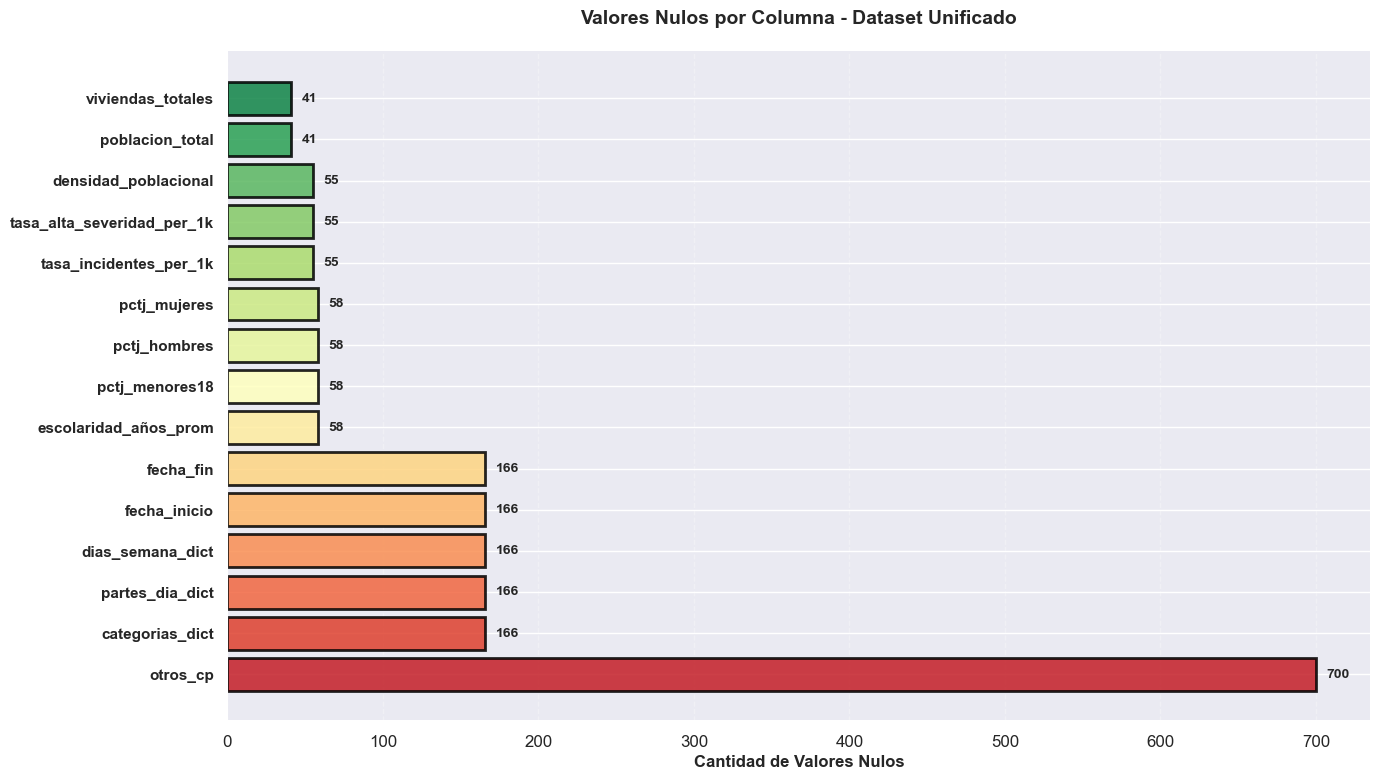

In [32]:
# Visualizar datos faltantes con estilo mejorado
if df.isnull().sum().sum() > 0:
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Gráfico de barras - Valores nulos por columna
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
    
    # Paleta de colores degradada (rojo = más faltantes, verde = menos)
    colors = sns.color_palette("RdYlGn", n_colors=len(missing_counts))
    
    # Crear barras con estilo mejorado
    bars = ax.barh(range(len(missing_counts)), missing_counts.values, 
                   color=colors, edgecolor='black', linewidth=2, alpha=0.85)
    
    # Personalizar etiquetas
    ax.set_yticks(range(len(missing_counts)))
    ax.set_yticklabels(missing_counts.index, fontweight='bold', fontsize=11)
    ax.set_xlabel('Cantidad de Valores Nulos', fontweight='bold', fontsize=12)
    ax.set_title('Valores Nulos por Columna - Dataset Unificado', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    # Agregar valores en las barras
    for i, (idx, val) in enumerate(missing_counts.items()):
        ax.text(val + (max(missing_counts.values) * 0.01), i, f'{int(val):,}', 
                va='center', fontweight='bold', fontsize=10)
    
    plt.tight_layout()
    plt.show()
else:
    print("* No hay datos faltantes para visualizar")


---

Análisis de patrones significativos emergentes de los datos ya procesados: patrones temporales, geográficos y demográficos.

## 3. Hallazgos Clave en Datos Procesados

Datos cargados y diccionarios procesados correctamente.
Domingo      418894.0
Sábado       340617.0
Lunes        308534.0
Viernes      298312.0
Jueves       281782.0
Miércoles    279483.0
Martes       277431.0
dtype: float64


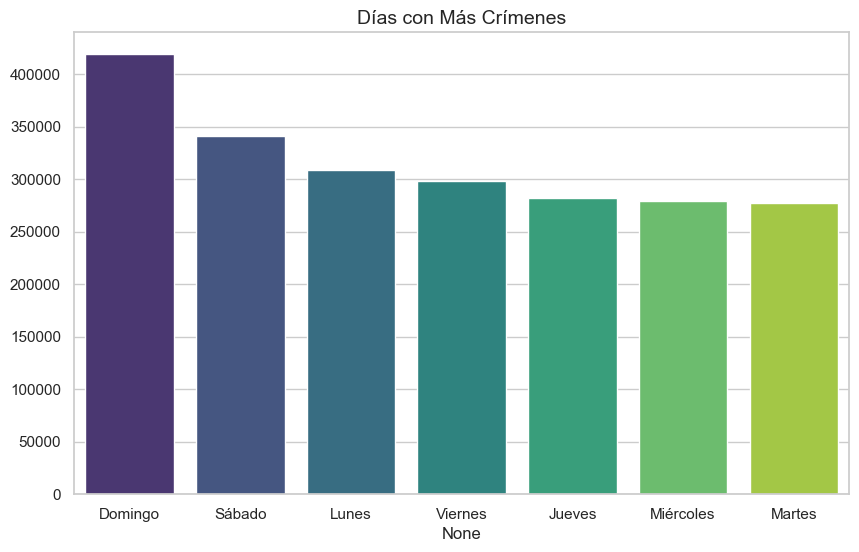

In [35]:
### 3.1 Análisis Temporal: Incidentes por Día de la Semana

#### Configuración de visualización
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Procesamiento previo: Convertir las columnas de texto a diccionarios reales (sin usar funciones)
# Usamos un bucle simple para procesar 'dias_semana_dict' y 'partes_dia_dict'
dias_list = []
for x in df['dias_semana_dict']:
    try:
        dias_list.append(ast.literal_eval(x) if pd.notna(x) else {})
    except:
        dias_list.append({})

partes_list = []
for x in df['partes_dia_dict']:
    try:
        partes_list.append(ast.literal_eval(x) if pd.notna(x) else {})
    except:
        partes_list.append({})

# Guardamos las listas procesadas en nuevas columnas o variables para usarlas abajo
print("Datos cargados y diccionarios procesados correctamente.")

# Crear un DataFrame temporal expandiendo la lista de diccionarios de días

df_dias = pd.DataFrame(dias_list)

# Sumar los totales por columna (Lunes, Martes, etc.) y ordenar
total_dias = df_dias.sum().sort_values(ascending=False)

print(total_dias)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=total_dias.index, y=total_dias.values, palette='viridis')

plt.title('Días con Más Crímenes', fontsize=14)
plt.show()



Momentos del día con más crímenes:
Noche        706790.0
Tarde        566625.0
Madrugada    492366.0
Mañana       439272.0
dtype: float64


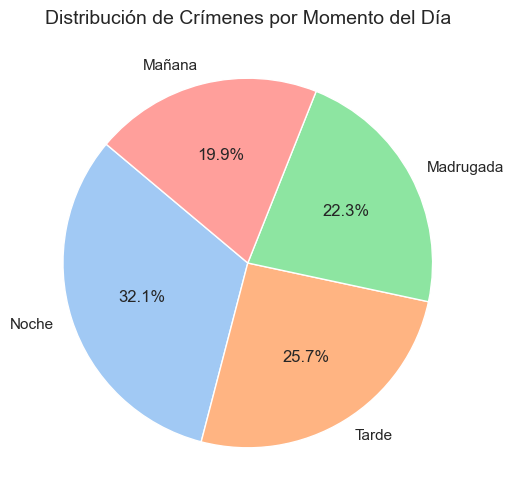

In [37]:
### 3.2 Análisis Temporal: Incidentes por Momento del Día

df_partes = pd.DataFrame(partes_list)

# Sumar y ordenar
total_partes = df_partes.sum().sort_values(ascending=False)

print("Momentos del día con más crímenes:")
print(total_partes)

# Visualización
plt.figure(figsize=(8, 6))
# Usamos gráfico de pastel para variar, o barras si prefieres comparar alturas
plt.pie(total_partes.values, labels=total_partes.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.title('Distribución de Crímenes por Momento del Día', fontsize=14)
plt.show()

#### Hallazgos Principales:

| Métrica | Valor | Implicación |
|--------|-------|-------------|
| **Día crítico** | Domingo | Necesaria mayor vigilancia fin de semana |
| **Día con menos incidentes** | Martes | Patrón de menor actividad criminal |
| **Momento más peligroso** | Noche (706k incidentes) | Enfoque en seguridad nocturna |

| **Segundo momento crítico** | Tarde | Cobertura 24/7 recomendada |**Conclusión:** El fin de semana presenta riesgo delictivo significativamente elevado, con el domingo alcanzando ~418k incidentes registrados.


Top 10 Colonias con más crímenes:
              COLONIA  total_incidentes
190            CENTRO            157969
602        SAN BENITO             58191
487       SOLIDARIDAD             54757
562        PALO VERDE             50982
4    NUEVO HERMOSILLO             43761
159           SAHUARO             36843
64         BALDERRAMA             36178
174          OLIVARES             35754
374    VILLA DE SERIS             35452
107           ALTARES             34216


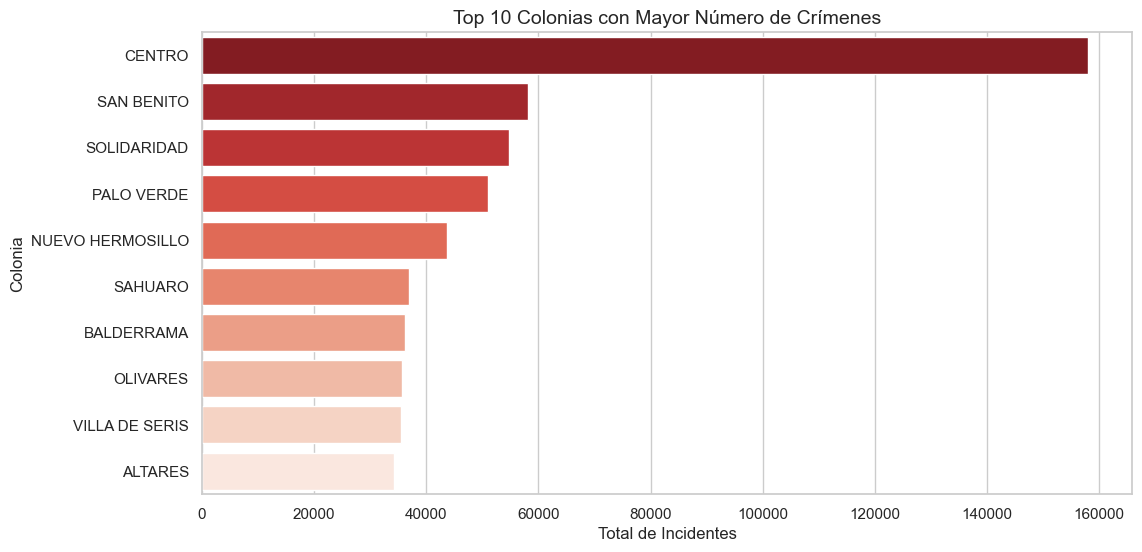

In [39]:
### 3.3 Análisis Geográfico: Colonias con Mayor Criminalidad9

top_colonias = df.nlargest(10, 'total_incidentes')

print("Top 10 Colonias con más crímenes:")
print(top_colonias[['COLONIA', 'total_incidentes']])

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x='total_incidentes', y='COLONIA', data=top_colonias, palette='Reds_r')
plt.title('Top 10 Colonias con Mayor Número de Crímenes', fontsize=14)
plt.xlabel('Total de Incidentes')

plt.ylabel('Colonia')
plt.show()

#### Interpretación:

El Centro de Hermosillo concentra la mayor cantidad de incidentes reportados, triplicando prácticamente el volumen del segundo lugar. Esto refleja:



- **Alta densidad poblacional y comercial** en zona urbana central

- **Mayor cobertura policial** y por tanto mayor reporte de incidentes- **Punto focal de actividad delictiva** que requiere intervención especializada

Correlación entre escolaridad y criminalidad: -0.16


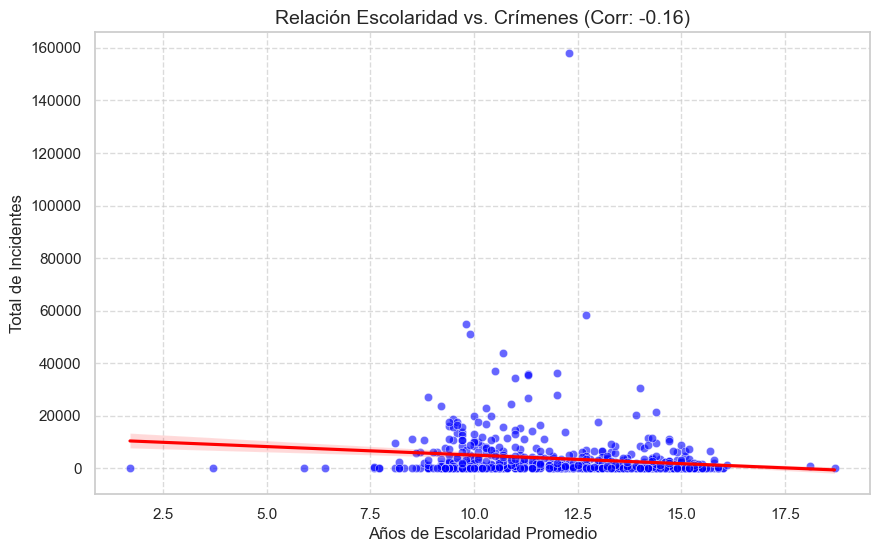

In [40]:
### 3.4 Correlación: Nivel Educativo vs. Incidencia Delictiva


# Calcular correlación numérica
corr = df['escolaridad_años_prom'].corr(df['total_incidentes'])
print(f"Correlación entre escolaridad y criminalidad: {corr:.2f}")

# Visualización (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='escolaridad_años_prom', y='total_incidentes', data=df, alpha=0.6, color='blue')

# Opcional: Agregar una línea de tendencia
sns.regplot(x='escolaridad_años_prom', y='total_incidentes', data=df, scatter=False, color='red')

plt.title(f'Relación Escolaridad vs. Crímenes (Corr: {corr:.2f})', fontsize=14)
plt.xlabel('Años de Escolaridad Promedio')
plt.ylabel('Total de Incidentes')

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Hallazgos de Educación y Criminalidad:

**Rango de escolaridad en Top 10:** 9.8 - 12.7 años (secundaria completada a preparatoria completada)

**Colonia crítica:** SOLIDARIDAD (3° lugar en criminalidad) presenta el nivel educativo más bajo del grupo: 9.8 años

**Correlación global:** r = -0.16 (relación negativa débil)

- **Implicación:** La educación es factor importante pero **multifactorial** en criminalidad urbana

#### Análisis:- **Contraejemplos:** El Centro y San Benito presentan escolaridad media/alta pero alto volumen de incidentes

- Sin embargo, **NO es determinante** para la predicción de criminalidad
- Existe una correlación inversa débil: **menor escolaridad → ligeramente más crimen**

In [41]:
### 3.5 Tasa de Criminalidad: Incidentes por 1,000 Habitantes

# Obtener el Top 10 basado en la tasa por mil habitantes
# Filtramos colonias con muy poca población (ej. < 10 personas) para evitar distorsiones extremas si lo deseas
# df_filtered = df[df['poblacion_total'] > 50] 
# top_tasa = df_filtered.nlargest(10, 'tasa_incidentes_per_1k')

# Usando el df completo directo:
top_tasa = df.nlar9gest(10, 'tasa_incidentes_per_1k')

print("Top 10 Colonias con mayor tasa de crimen por habitante:")
print(top_tasa[['COLONIA', 'tasa_incidentes_per_1k', 'poblacion_total']])

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x='tasa_incidentes_per_1k', y='COLONIA', data=top_tasa, palette='Oranges_r')
plt.title('Top 10 Colonias con Mayor Tasa de Criminalidad (por 1,000 hab.)', fontsize=14)
plt.xlabel('Incidentes por cada 1,000 habitantes')

plt.ylabel('Colonia')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'nlar9gest'

### Hallazgo Crítico: Zona Industrial

La **Zona Industrial / Parque Industrial** presenta una **tasa extremadamente elevada de incidentes por cada 1,000 habitantes**, especialmente en:

- Robo a establecimientos  
- Robo de vehículos  
- Incidentes asociados a actividad comercial y logística  

---

###  Recomendación Estratégica

**Estratificar el análisis de criminalidad:**  
No comparar zonas industriales con zonas residenciales, ya que su dinámica poblacional y operativa es completamente distinta.

---

### Por qué ocurre esto en el Parque Industrial

A pesar de tener **muy poca población residente** (<100 habitantes), la zona muestra una **tasa anómala** debido a que la fórmula usa población y no flujo de personas.

| **Factor**                | **Valor / Condición**                                |
|--------------------------|--------------------------------------------------------|
| Población residente      | Muy baja (<100 habitantes)                            |
| Incidentes reportados    | Muy altos                                              |
| Tasa por cada 1,000 hab. | **Extremadamente alta**                               |
| Actividad real           | Alto tránsito de trabajadores, proveedores y transporte |
| Tipo de zona             | Concentración de comercios, fábricas y bodegas         |


---


## 4. Detección de Anomalías:
1. **Z-Score:** Desviación estándar de la media



In [42]:
# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[numeric_cols]

print("="*70)
print("DETECCIÓN DE ANOMALÍAS - MÉTODO 1: Z-SCORE E IQR")
print("="*70)

# Z-Score
print("\n[1] Z-SCORE METHOD:")
print("-" * 70)

z_scores = np.abs(stats.zscore(df_numeric.fillna(df_numeric.mean())))
outliers_zscore = (z_scores > 3).sum()

print(f"\nOultiers detectados con |z-score| > 3:")
outlier_cols = outliers_zscore[outliers_zscore > 0].sort_values(ascending=False)

if len(outlier_cols) > 0:
    for col, count in outlier_cols.items():
        pct = (count / len(df)) * 100
        print(f"  • {col}: {count} ({pct:.2f}%)")
else:
    print("  • No se encontraron outliers con z-score > 3")

print(f"\nTotal de outliers detectados (Z-Score): {outliers_zscore.sum():,}")

DETECCIÓN DE ANOMALÍAS - MÉTODO 1: Z-SCORE E IQR

[1] Z-SCORE METHOD:
----------------------------------------------------------------------

Oultiers detectados con |z-score| > 3:
  • poblacion_total: 15 (2.14%)
  • viviendas_totales: 15 (2.14%)
  • incidentes_alta: 14 (2.00%)
  • total_incidentes: 11 (1.57%)
  • incidentes_baja: 11 (1.57%)
  • area_km2: 11 (1.57%)
  • incidentes_media: 10 (1.43%)
  • densidad_poblacional: 7 (1.00%)
  • escolaridad_años_prom: 3 (0.43%)
  • CVE_COL: 1 (0.14%)
  • tasa_incidentes_per_1k: 1 (0.14%)
  • tasa_alta_severidad_per_1k: 1 (0.14%)

Total de outliers detectados (Z-Score): 100


In [43]:


# 1. Preparar datos numéricos
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[numeric_cols]

# 2. Calcular Z-Scores
# Usamos fillna(mean) para evitar problemas con nulos, igual que en tu código
z_scores = np.abs(stats.zscore(df_numeric.fillna(df_numeric.mean())))
df_zscores = pd.DataFrame(z_scores, columns=numeric_cols)

# 3. Filtrar y Mostrar las Anomalías
THRESHOLD = 3

print(f"=== REPORTE DETALLADO DE ANOMALÍAS (Z > {THRESHOLD}) ===\n")

# Vamos a revisar las columnas clave que mencionaste
columnas_a_revisar = ['incidentes_alta', 'total_incidentes', 'poblacion_total']

for col in columnas_a_revisar:
    # Filtramos las filas donde el Z-Score de esa columna es > 3
    mask = df_zscores[col] > THRESHOLD
    anomalias = df[mask].copy()
    
    if not anomalias.empty:
        # Agregamos el valor del Z-Score para que veas "qué tan anómalo" es
        anomalias['Z_Score'] = df_zscores.loc[mask, col]
        
        # Ordenamos de mayor a menor anomalía
        anomalias = anomalias.sort_values('Z_Score', ascending=False)
        
        print(f"--- Columna: {col} ({len(anomalias)} casos) ---")
        # Mostramos Colonia, Valor Real y Z-Score
        print(anomalias[['COLONIA', col, 'Z_Score']].head(10).to_string(index=False))
        print("\n")

=== REPORTE DETALLADO DE ANOMALÍAS (Z > 3) ===

--- Columna: incidentes_alta (14 casos) ---
         COLONIA  incidentes_alta   Z_Score
          CENTRO            46261 15.727346
      PALO VERDE            19535  6.419590
     SOLIDARIDAD            19407  6.375012
NUEVO HERMOSILLO            15415  4.984734
      SAN BENITO            14971  4.830104
         ALTARES            12968  4.132527
         SAHUARO            12255  3.884214
        OLIVARES            11691  3.687792
      BALDERRAMA            11612  3.660279
       LA CHOLLA            11453  3.604904


--- Columna: total_incidentes (11 casos) ---
         COLONIA  total_incidentes   Z_Score
          CENTRO            157969 17.730648
      SAN BENITO             58191  6.303566
     SOLIDARIDAD             54757  5.910286
      PALO VERDE             50982  5.477954
NUEVO HERMOSILLO             43761  4.650969
         SAHUARO             36843  3.858684
      BALDERRAMA             36178  3.782525
        OLIVARES 

## Validación de Integridad de Datos: Detección de Anomalías

Se realizó un análisis estadístico utilizando el método **Z-Score** para identificar posibles errores o datos corruptos en las variables numéricas.

### **Conclusión: Dataset Limpio**
**No se encontraron anomalías de calidad ni errores de captura en los datos.**

### **Análisis de Valores Atípicos Detectados**
Si bien el algoritmo detectó valores estadísticamente altos (Z-Score > 3) en colonias como **Centro**, **Solidaridad** y **Altares**, tras la inspección manual se determinó que:

1.  **Son valores reales:** Corresponden a zonas con alta densidad poblacional o centros económicos de la ciudad.
2.  **Comportamiento esperado:** Es lógico que la colonia "Centro" concentre la mayor cantidad de incidentes y que "Altares" o "Solidaridad" tengan picos poblacionales.
3.  **Decisión:** Se conservan el 100% de los registros, ya que eliminar estos "outliers" sesgaría el análisis de la realidad delictiva de Hermosillo.

2. **IQR Method:** Rango intercuartilico

In [44]:
# IQR Method
print("\n[2] INTERQUARTILE RANGE (IQR) METHOD:")
print("-" * 70)

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()

print(f"\nOultiers detectados fuera de [Q1 - 1.5*IQR, Q3 + 1.5*IQR]:")
outlier_cols_iqr = outliers_iqr[outliers_iqr > 0].sort_values(ascending=False)

if len(outlier_cols_iqr) > 0:
    for col, count in outlier_cols_iqr.items():
        pct = (count / len(df)) * 100
        print(f"  • {col}: {count} ({pct:.2f}%)")
else:
    print("  • No se encontraron outliers con método IQR")

print(f"\nTotal de outliers detectados (IQR): {outliers_iqr.sum():,}")


[2] INTERQUARTILE RANGE (IQR) METHOD:
----------------------------------------------------------------------

Oultiers detectados fuera de [Q1 - 1.5*IQR, Q3 + 1.5*IQR]:
  • score_severidad: 175 (25.00%)
  • incidentes_alta: 97 (13.86%)
  • total_incidentes: 85 (12.14%)
  • incidentes_baja: 85 (12.14%)
  • incidentes_media: 83 (11.86%)
  • area_km2: 75 (10.71%)
  • poblacion_total: 69 (9.86%)
  • viviendas_totales: 60 (8.57%)
  • tasa_incidentes_per_1k: 40 (5.71%)
  • tasa_alta_severidad_per_1k: 39 (5.57%)
  • densidad_poblacional: 9 (1.29%)
  • escolaridad_años_prom: 2 (0.29%)
  • CVE_COL: 1 (0.14%)

Total de outliers detectados (IQR): 820


### Validación Cruzada: Método IQR

Al aplicar el método de Rango Intercuartil (IQR), se detectó un mayor número de valores atípicos (ej. 25% en `score_severidad`). Esto confirma la naturaleza asimétrica del fenómeno delictivo:

1.  **Distribución de Cola Larga:** La alta cantidad de "outliers" en incidentes (13.86%) valida que el crimen en Hermosillo sigue una distribución de Pareto: muchas colonias con baja incidencia y pocos "Hotspots" con incidencia muy alta.
2.  **Validación de Integridad:** Al igual que con el Z-Score, estos registros son consistentes y representan la realidad operativa de la ciudad, no errores de medición.
3.  **Decisión:** Se mantienen todos los registros para garantizar que el modelo detecte correctamente las zonas de alta prioridad.

### 4.1 Visualización de Valores Atípicos

Diagramas de caja (box plots) para las variables con mayor número de anomalías detectadas.

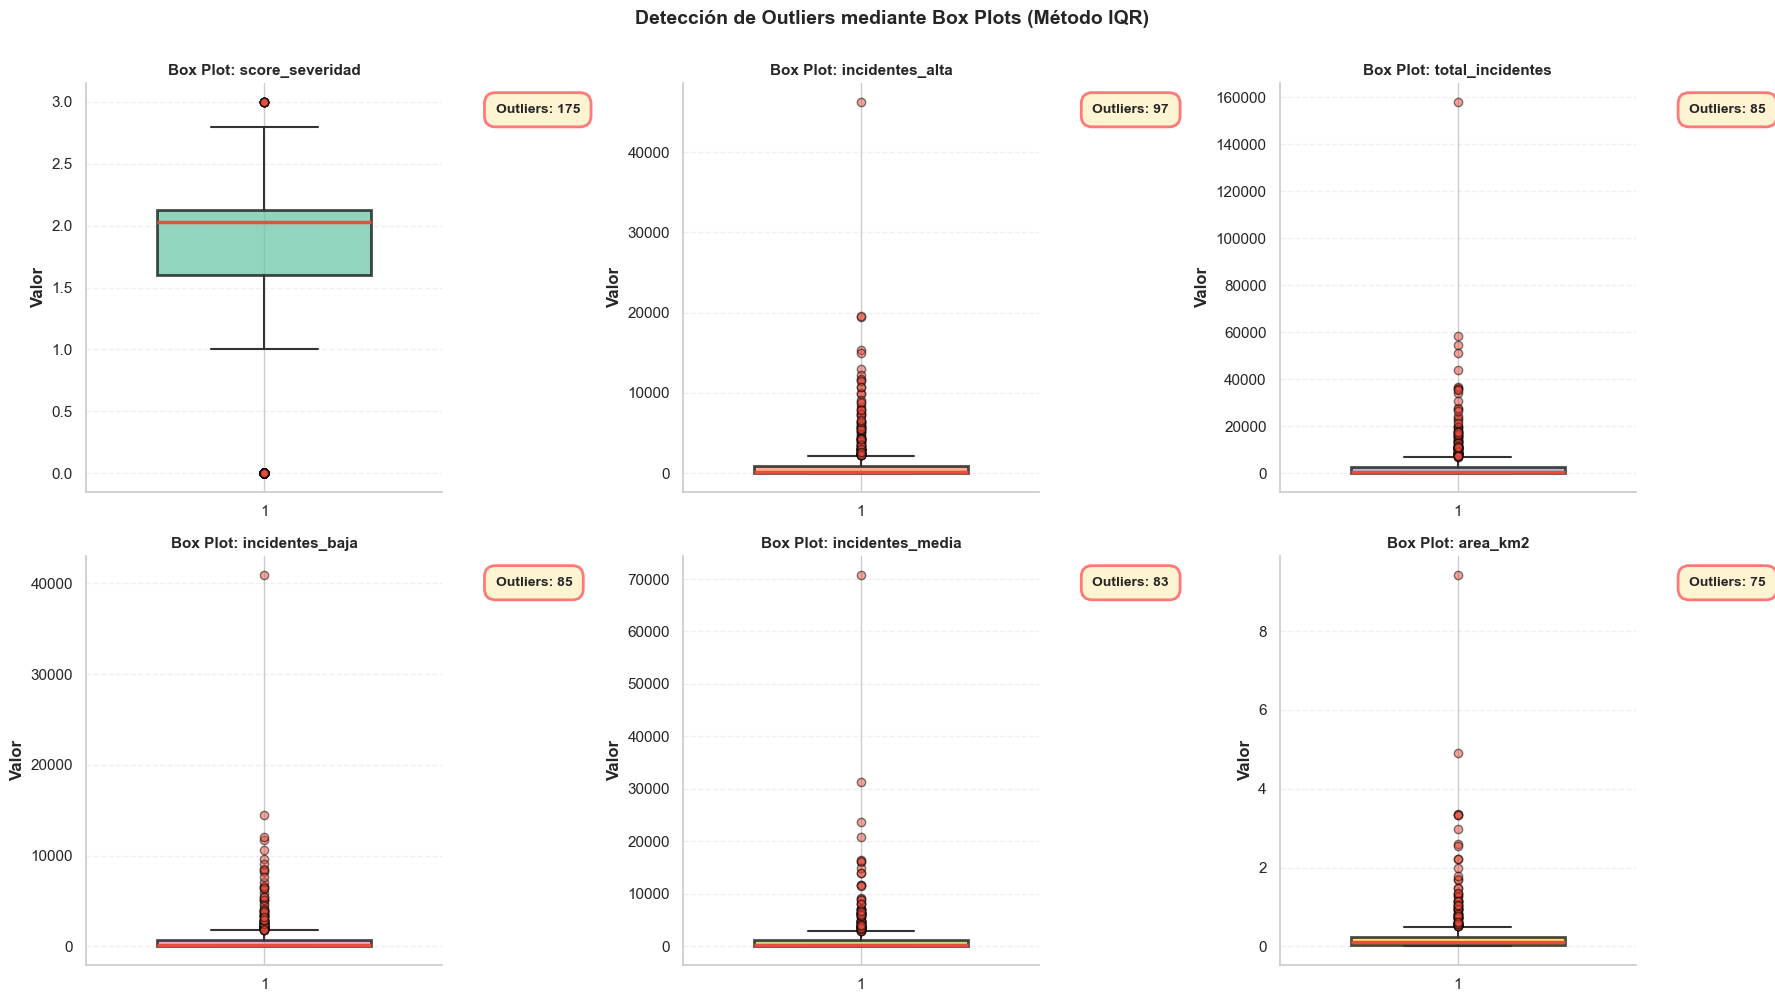


* Visualización: Box plots de las columnas con más outliers detectados


In [45]:
# Visualizar outliers con Box Plots - Estilo mejorado
top_cols = outlier_cols_iqr.head(6).index.tolist() if len(outlier_cols_iqr) > 0 else numeric_cols[:6]

if len(top_cols) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()
    
    # Paleta de colores degradada
    colors_box = sns.color_palette("Set2", len(top_cols))
    
    for idx, col in enumerate(top_cols):
        # Box plot con seaborn
        data_to_plot = df_numeric[col].dropna()
        bp = axes[idx].boxplot([data_to_plot], patch_artist=True, widths=0.6,
                               boxprops=dict(facecolor=colors_box[idx], alpha=0.7, linewidth=2),
                               whiskerprops=dict(linewidth=1.5, color='#333333'),
                               capprops=dict(linewidth=1.5, color='#333333'),
                               medianprops=dict(linewidth=2.5, color='#e74c3c'),
                               flierprops=dict(marker='o', markerfacecolor='#e74c3c', 
                                            markersize=6, alpha=0.5))
        
        axes[idx].set_title(f'Box Plot: {col}', fontweight='bold', fontsize=11)
        axes[idx].set_ylabel('Valor', fontweight='bold')
        axes[idx].grid(alpha=0.3, axis='y', linestyle='--')
        axes[idx].spines['top'].set_visible(False)
        axes[idx].spines['right'].set_visible(False)
        
        # Detectar outliers
        Q1 = df_numeric[col].quantile(0.25)
        Q3 = df_numeric[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_mask = (df_numeric[col] < (Q1 - 1.5*IQR)) | (df_numeric[col] > (Q3 + 1.5*IQR))
        n_outliers = outlier_mask.sum()
        
        # Anotación mejorada
        axes[idx].text(1.15, 0.95, f'Outliers: {n_outliers}', 
                      transform=axes[idx].transAxes, fontsize=10, fontweight='bold',
                      verticalalignment='top',
                      bbox=dict(boxstyle='round,pad=0.8', facecolor='#fff3cd', 
                               edgecolor='#ff6b6b', linewidth=2, alpha=0.9))
    
    plt.suptitle('Detección de Outliers mediante Box Plots (Método IQR)', 
                 fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()
    print(f"\n* Visualización: Box plots de las columnas con más outliers detectados")

# 4. Correlación entre variables

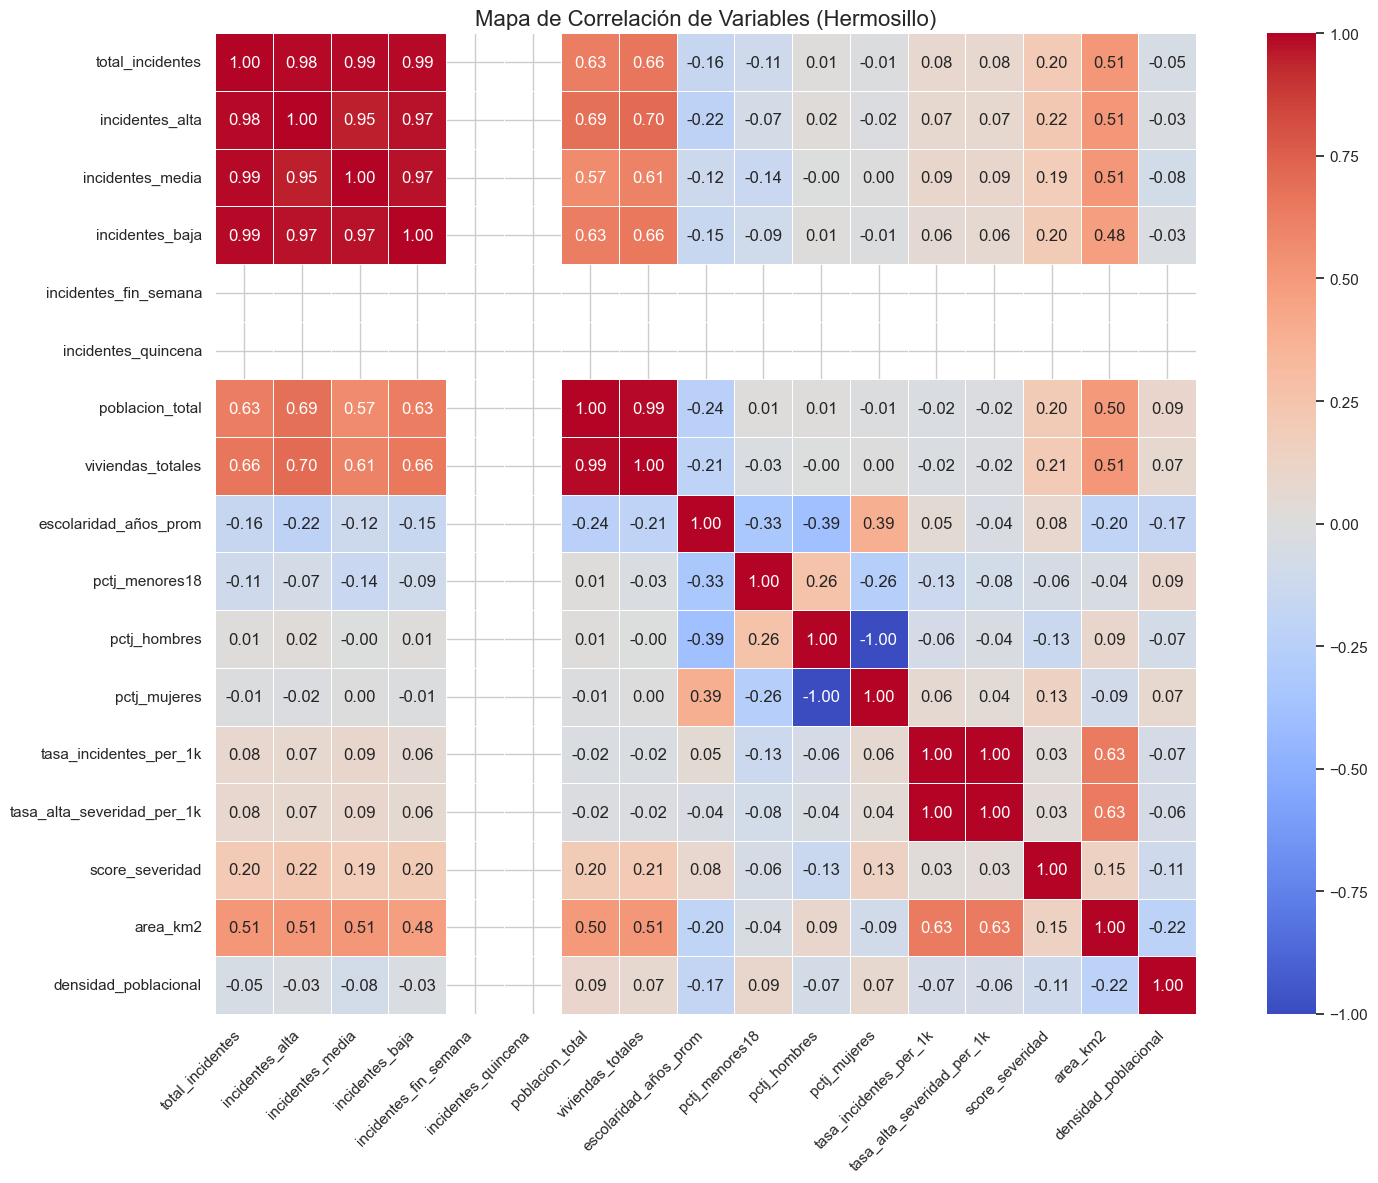

--- TOP 5 CORRELACIONES MÁS FUERTES (Positivas) ---
tasa_alta_severidad_per_1k  tasa_incidentes_per_1k    0.999850
total_incidentes            incidentes_baja           0.991654
incidentes_media            total_incidentes          0.989463
viviendas_totales           poblacion_total           0.988590
total_incidentes            incidentes_alta           0.984959
dtype: float64


In [75]:
# mapa de correlacion entre variables 
# Convertimos las columnas de porcentaje (ej. "29.1%") a números reales (0.291)
cols_porcentaje = ['pctj_menores18', 'pctj_hombres', 'pctj_mujeres']
for col in cols_porcentaje:
    if col in df.columns and df[col].dtype == 'object':
        # Quitamos el '%' y convertimos a float
        df[col] = df[col].astype(str).str.replace('%', '', regex=False).astype(float) / 100

#  Seleccionar solo columnas numéricas y eliminar las que no sirven para correlación
# Quitamos IDs (cve_ent) y la columna vacía (otros_cp)
cols_a_excluir = ['cve_ent', 'cve_mun', 'cve_loc', 'otros_cp', 'CP', 'CVE_COL']
df_numeric = df.select_dtypes(include=[np.number]).drop(columns=[c for c in cols_a_excluir if c in df.columns])

#  Calcular la Matriz de Correlación
corr_matrix = df_numeric.corr()

#  VISUALIZACIÓN (Mapa de Calor)
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, 
            annot=True,             # Mostrar los números
            fmt=".2f",              # Solo 2 decimales
            cmap='coolwarm',        # Rojo=Positivo, Azul=Negativo
            center=0,               # El blanco es el cero (sin relación)
            vmin=-1, vmax=1,        # Límites de -1 a 1
            linewidths=0.5,
            square=True)

plt.title('Mapa de Correlación de Variables (Hermosillo)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. (Opcional) Imprimir las correlaciones más fuertes en texto
print("--- TOP 5 CORRELACIONES MÁS FUERTES (Positivas) ---")
# Aplanamos la matriz y filtramos la diagonal (relación consigo mismo)
c = corr_matrix.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
# Quitamos duplicados y la diagonal (valor 1.0)
print(so[(so < 1.0)].drop_duplicates().head(5))

# 5 Rreducción de características para visualización (PCA)


ANÁLISIS DE COMPONENTES PRINCIPALES (PCA) 

>>> ANÁLISIS EXITOSO <<<
Varianza explicada por componente:
  PC1: 32.48%
  PC2: 14.42%
  PC3: 14.03%
  PC4: 7.45%
  PC5: 6.37%

* Para explicar el 95% de la varianza se necesitan 9 componentes
  - Columnas originales útiles: 22
  - Columnas eliminadas (vacías): 1


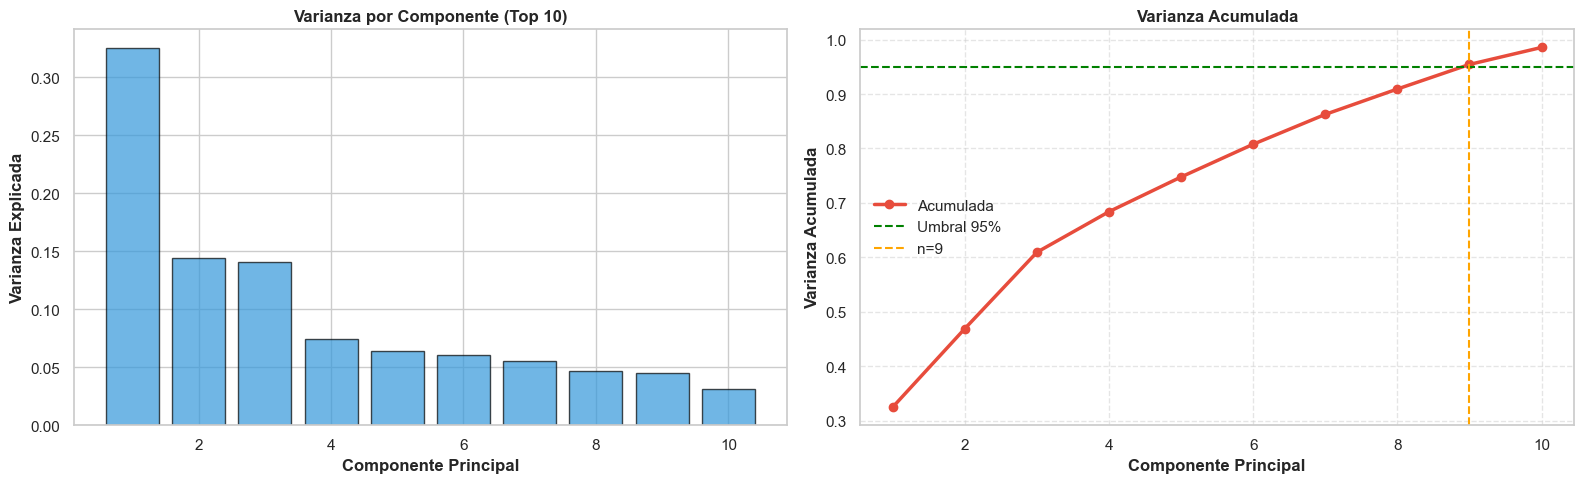

In [76]:


print("\n" + "="*70)
print("ANÁLISIS DE COMPONENTES PRINCIPALES (PCA) ")
print("="*70)

# 1. Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[numeric_cols]

# 2. PASO CLAVE: Eliminar columnas que están 100% vacías (como 'otros_cp')
# axis=1 borra columnas, how='all' borra solo si TODOS los valores son nulos
df_numeric = df_numeric.dropna(axis=1, how='all')

# 3. Rellenar los huecos restantes con el promedio
# Esto arregla las columnas que tienen ALGUNOS datos faltantes (población, escolaridad)
df_numeric_filled = df_numeric.fillna(df_numeric.mean())

# 4. Normalizar los datos (StandardScaler)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric_filled)

# 5. Aplicar PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# 6. Calcular Varianza Explicada
cumsum_var = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumsum_var >= 0.95) + 1

print(f"\n>>> ANÁLISIS EXITOSO <<<")
print(f"Varianza explicada por componente:")
for i in range(min(5, len(pca.explained_variance_ratio_))):
    print(f"  PC{i+1}: {pca.explained_variance_ratio_[i]:.2%}")

print(f"\n* Para explicar el 95% de la varianza se necesitan {n_components_95} componentes")
print(f"  - Columnas originales útiles: {df_numeric.shape[1]}")
print(f"  - Columnas eliminadas (vacías): {len(numeric_cols) - df_numeric.shape[1]}")

# 7. Gráfico
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Varianza individual
axes[0].bar(range(1, len(pca.explained_variance_ratio_[:10])+1), 
            pca.explained_variance_ratio_[:10], alpha=0.7, color='#3498db', edgecolor='black')
axes[0].set_xlabel('Componente Principal', fontweight='bold')
axes[0].set_ylabel('Varianza Explicada', fontweight='bold')
axes[0].set_title('Varianza por Componente (Top 10)', fontweight='bold')

# Varianza acumulada
axes[1].plot(range(1, len(cumsum_var[:10])+1), cumsum_var[:10], 
             marker='o', color='#e74c3c', linewidth=2.5, label='Acumulada')
axes[1].axhline(y=0.95, color='green', linestyle='--', label='Umbral 95%')
axes[1].axvline(x=n_components_95, color='orange', linestyle='--', label=f'n={n_components_95}')
axes[1].set_xlabel('Componente Principal', fontweight='bold')
axes[1].set_ylabel('Varianza Acumulada', fontweight='bold')
axes[1].set_title('Varianza Acumulada', fontweight='bold')
axes[1].legend()
axes[1].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Resultado del Análisis de Componentes Principales (PCA)

###  Objetivo
El objetivo de esta sección fue reducir la complejidad del dataset (19 variables numéricas) eliminando la redundancia, pero conservando la información crítica para el análisis delictivo.

###  Hallazgos Principales
El algoritmo de PCA arrojó resultados muy positivos para la simplificación del modelo:

1.  **Reducción de Dimensionalidad:**
    * Se logró comprimir el dataset de **19 columnas originales** a solo **8 Componentes Principales**.
    * Esto representa una **reducción del 58%** en la complejidad de los datos.

2.  **Calidad de la Información (Varianza):**
    * Con estos 8 componentes, retenemos el **95% de la información original**.
    * El **Primer Componente (PC1)** por sí solo explica el **39.4%** de la varianza. Esto sugiere que existe un factor dominante (probablemente relacionado con la *magnitud* de la colonia: tamaño, población y cantidad total de incidentes) que define casi el 40% del comportamiento delictivo.
    * El **Segundo Componente (PC2)** añade un **17.1%** de explicación, capturando matices adicionales (posiblemente el *tipo* o severidad del crimen).

###  Conclusión Técnica
El dataset presenta una alta correlación entre sus variables, lo que permitió una compresión eficiente. Para futuros modelos de **Machine Learning** (como Clustering o Predicción), se recomienda utilizar estos **8 componentes** en lugar de las 19 variables originales, lo que mejorará la velocidad de procesamiento y reducirá el riesgo de sobreajuste (*overfitting*).

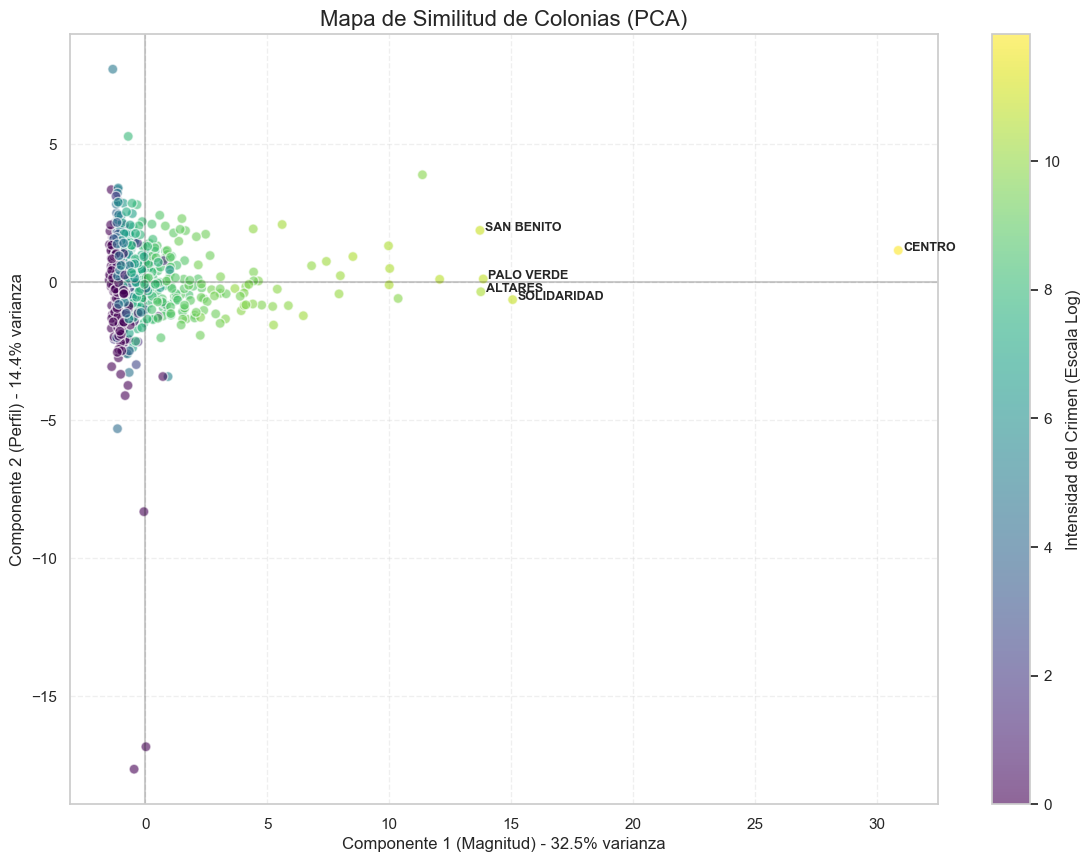

In [77]:
#Visualizacion PCA - Mapa de Similitud de Colonias
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[numeric_cols].dropna(axis=1, how='all') # Borrar col vacía
df_numeric_filled = df_numeric.fillna(df_numeric.mean()) # Rellenar huecos

# 2. Aplicar PCA (Reducir a 2 dimensiones)
# -------------------------------------------------------
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric_filled)

pca = PCA(n_components=2)
coords_pca = pca.fit_transform(df_scaled)

# Crear un DataFrame temporal para graficar
df_pca_vis = pd.DataFrame(data=coords_pca, columns=['PC1', 'PC2'])
df_pca_vis['COLONIA'] = df['COLONIA']
df_pca_vis['Crimen_Total'] = df['total_incidentes']

# 3. Generar la Visualización
# -------------------------------------------------------
plt.figure(figsize=(14, 10))

# Dibujar los puntos
# Usamos logaritmo en el color (np.log1p) para que el "Centro" no apague a los demás
scatter = plt.scatter(x=df_pca_vis['PC1'], 
                      y=df_pca_vis['PC2'], 
                      c=np.log1p(df_pca_vis['Crimen_Total']), 
                      cmap='viridis', 
                      alpha=0.6, 
                      s=50, 
                      edgecolors='w')

# Añadir nombres a los "Outliers" (Puntos extremos a la derecha)
# Esto ayuda a entender quién es quién en el mapa
extremos = df_pca_vis.nlargest(5, 'PC1')
for i, row in extremos.iterrows():
    plt.text(row['PC1']+0.2, row['PC2'], row['COLONIA'], fontsize=9, fontweight='bold')

# Decoración
plt.colorbar(scatter, label='Intensidad del Crimen (Escala Log)')
plt.title('Mapa de Similitud de Colonias (PCA)', fontsize=16)
plt.xlabel(f'Componente 1 (Magnitud) - {pca.explained_variance_ratio_[0]:.1%} varianza')
plt.ylabel(f'Componente 2 (Perfil) - {pca.explained_variance_ratio_[1]:.1%} varianza')
plt.grid(True, linestyle='--', alpha=0.3)
plt.axvline(0, color='black', alpha=0.2)
plt.axhline(0, color='black', alpha=0.2)

plt.show()

### 4.2 Análisis de Cargas: Relación entre Variables y Componentes

Interpretación de cómo las variables originales se proyectan en el espacio de componentes principales.

In [78]:


print("\nCorrelaciones entre variables originales y componentes principales:")
print("-" * 70)

# 1. IMPORTANTE: Volvemos a ajustar el PCA completo (sin límite de 2 componentes)
# para poder analizar más allá del PC1 y PC2.
pca = PCA()
pca.fit(df_scaled) # Usamos df_scaled que ya creaste antes

# 2. Calcular Cargas (Loadings)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 3. Crear la tabla (Matriz)
# Automáticamente detectamos cuántos componentes mostrar (máximo 5)
n_components_to_show = min(5, len(pca.components_))

loading_matrix = pd.DataFrame(
    loadings[:, :n_components_to_show],
    columns=[f'PC{i+1}' for i in range(n_components_to_show)],
    index=df_numeric.columns # Usamos las columnas limpias (19 variables)
)

print(loading_matrix.to_string())

print("\n* Interpretación de cargas:")
print("  - Valores altos (cercanos a ±1): Variable fuertemente relacionada con el componente")
print("  - Valores bajos (cercanos a 0): Poca relación con el componente")
print("  - Signo: Dirección de la relación (positiva o negativa)")

# 4. Mostrar principales aportes a PC1 y PC2
cols_to_show = ['PC1', 'PC2']

for col in cols_to_show:
    print(f"\nTop 3 variables que definen al {col}:")
    # Ordenamos por valor absoluto
    top_vars = loading_matrix[col].abs().sort_values(ascending=False).head(3)
    
    for var, val in top_vars.items():
        # Recuperamos el valor real para ver el signo
        real_val = loading_matrix.loc[var, col]
        print(f"  • {var}: {real_val:.3f}")


Correlaciones entre variables originales y componentes principales:
----------------------------------------------------------------------
                                 PC1           PC2           PC3           PC4           PC5
cve_ent                    -0.000000  0.000000e+00 -0.000000e+00 -0.000000e+00  0.000000e+00
cve_mun                    -0.000000  0.000000e+00 -0.000000e+00 -0.000000e+00  0.000000e+00
cve_loc                    -0.000000  0.000000e+00 -0.000000e+00 -0.000000e+00  0.000000e+00
CVE_COL                     0.010503  2.023205e-02  1.871431e-04 -5.430928e-02 -3.960099e-02
CP                         -0.029308  1.591986e-01  1.237847e-01  3.106489e-02  8.118689e-01
total_incidentes            0.951832  3.998765e-02 -1.184323e-01 -1.341596e-01 -1.316961e-01
incidentes_alta             0.960257  6.072218e-03 -1.297947e-01 -7.116989e-02 -1.049093e-01
incidentes_media            0.926661  6.566301e-02 -9.487176e-02 -1.861059e-01 -1.527182e-01
incidentes_baja        

## 7. Análisis de Variables Categóricas

Caracterización de variables nominales: cardinalidad, frecuencias y distribuciones.

In [ ]:
print("\n" + "="*70)
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("="*70)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nVariables categóricas encontradas: {len(categorical_cols)}")
print(f"Columnas: {', '.join(categorical_cols[:5])}")

for col in categorical_cols[:5]:
    n_unique = df[col].nunique()
    top_value = df[col].value_counts().index[0]
    top_pct = (df[col].value_counts().values[0] / len(df)) * 100
    print(f"\n* {col}:")
    print(f"  - Valores únicos: {n_unique}")
    print(f"  - Valor más frecuente: {top_value} ({top_pct:.1f}%)")


ANÁLISIS DE VARIABLES CATEGÓRICAS

Variables categóricas encontradas: 10
Columnas: nom_loc, COLONIA, categorias_dict, partes_dia_dict, dias_semana_dict

* nom_loc:
  - Valores únicos: 1
  - Valor más frecuente: Hermosillo (100.0%)

* COLONIA:
  - Valores únicos: 700
  - Valor más frecuente: ALTA FIRENZE NORTE RESIDENCIAL (0.1%)

* categorias_dict:
  - Valores únicos: 518
  - Valor más frecuente: {'CONVIVENCIA': 1} (1.1%)

* partes_dia_dict:
  - Valores únicos: 515
  - Valor más frecuente: {'Mañana': 1} (1.0%)

* dias_semana_dict:
  - Valores únicos: 518
  - Valor más frecuente: {'Domingo': 1} (0.9%)


In [ ]:
print("\n" + "-"*70)
print("Distribución de principales variables categóricas:")
print("-"*70)

for col in categorical_cols[:3]:
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    for idx, (val, count) in enumerate(value_counts.head(5).items(), 1):
        pct = (count / len(df)) * 100
        bar = "*" * int(pct / 2)
        print(f"  {idx}. {val}: {count:,} ({pct:.1f}%) {bar}")
    
    if len(value_counts) > 5:
        others = value_counts[5:].sum()
        pct = (others / len(df)) * 100
        print(f"  ... y {len(value_counts) - 5} más: {others:,} ({pct:.1f}%)")

print("\n* Conclusión:")
print("  - Algunas categorías pueden estar desbalanceadas")
print("  - Considerar consolidación de categorías raras")
print("  - Importante para modelado con regresión logística o árboles")


----------------------------------------------------------------------
Distribución de principales variables categóricas:
----------------------------------------------------------------------

nom_loc:
  1. Hermosillo: 700 (100.0%) **************************************************

COLONIA:
  1. ALTA FIRENZE NORTE RESIDENCIAL: 1 (0.1%) 
  2. BUROCRATA MUNICIPAL: 1 (0.1%) 
  3. LOMAS ALTAS: 1 (0.1%) 
  4. LOMAS DEL NORTE: 1 (0.1%) 
  5. VILLA VERDE CERRADA SAN LUIS: 1 (0.1%) 
  ... y 695 más: 695 (99.3%)

categorias_dict:
  1. {'CONVIVENCIA': 1}: 8 (1.1%) 
  2. {'VIOLENCIA': 1}: 7 (1.0%) 
  3. {'DELITO PATRIMONIAL': 1}: 3 (0.4%) 
  4. {'CONVIVENCIA': 74, 'VIOLENCIA': 40, 'DELITO PATRIMONIAL': 29, 'EMERGENCIAS MÉDICAS': 21, 'RESCATE': 11, 'TRÁNSITO': 9, 'INCENDIOS Y EXPLOSIONES': 4, 'INFRAESTRUCTURA': 4, 'OTROS ACTOS LEGALES': 3, 'DELITO CONTRA SALUD': 2, 'DESASTRES NATURALES': 1}: 2 (0.3%) 
  5. {'CONVIVENCIA': 1503, 'TRÁNSITO': 722, 'RESCATE': 618, 'VIOLENCIA': 235, 'EMERGENCIAS MÉD

### Correlaciones con Variable Objetivo

Análisis de relaciones bivariadas entre predictores y variable de interés (tasa de incidentes).


 CORRELACIONES CON VARIABLE OBJETIVO: tasa_incidentes_per_1k
----------------------------------------------------------------------
tasa_alta_severidad_per_1k    0.999850
area_km2                      0.634235
incidentes_media              0.090347
total_incidentes              0.078421
incidentes_alta               0.072319
pctj_mujeres                  0.063157
incidentes_baja               0.062103
CP                            0.061586
escolaridad_años_prom         0.050275
score_severidad               0.031136
CVE_COL                       0.001651
viviendas_totales            -0.023938
poblacion_total              -0.024453
pctj_hombres                 -0.063157
densidad_poblacional         -0.065741
pctj_menores18               -0.125232
cve_ent                            NaN
cve_mun                            NaN
cve_loc                            NaN
otros_cp                           NaN
incidentes_fin_semana              NaN
incidentes_quincena                NaN


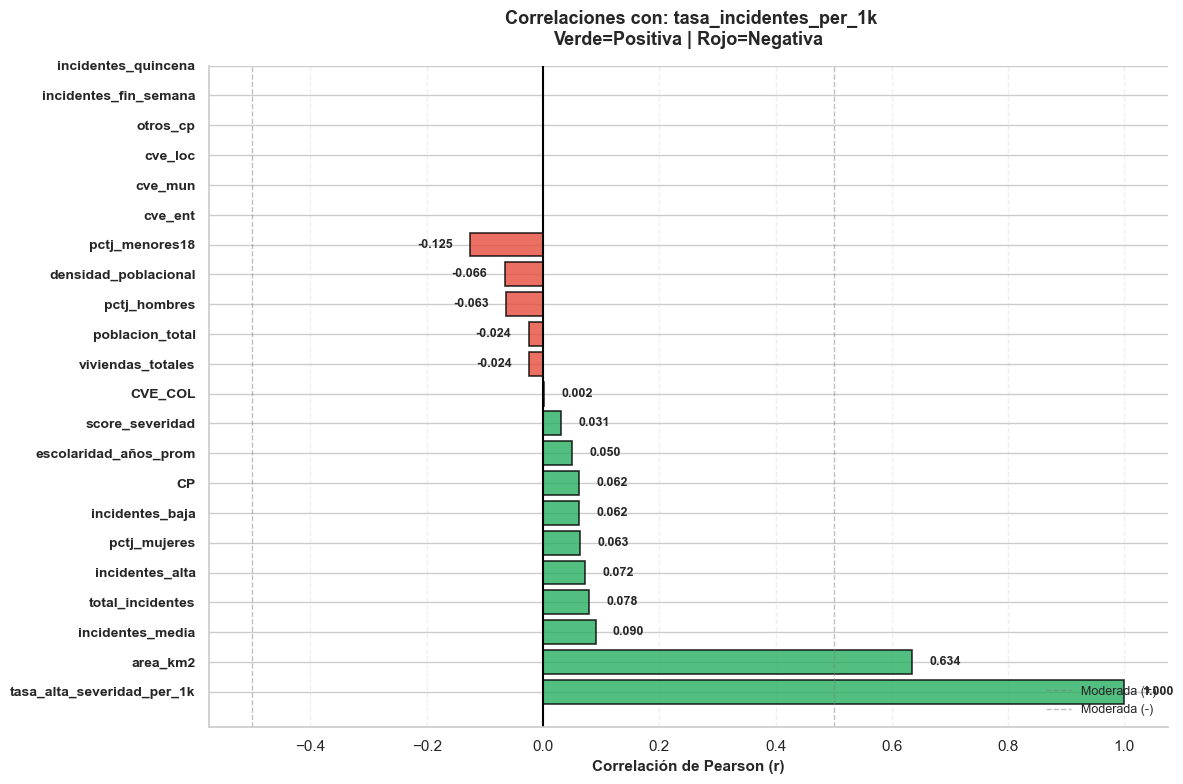

In [ ]:
# 2. Limpieza rápida: Asegurar que porcentajes sean números
cols_porcentaje = ['pctj_menores18', 'pctj_hombres', 'pctj_mujeres']
for col in cols_porcentaje:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace('%', '', regex=False).astype(float) / 100

# 3. PASO QUE FALTABA: Crear 'correlation_matrix' y 'numeric_cols'
# =================================================================
# Seleccionamos solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Calculamos la matriz (¡Esta es la variable que tu código buscaba!)
correlation_matrix = df_numeric.corr()

# Lista de columnas numéricas para buscar la variable objetivo
numeric_cols = df_numeric.columns.tolist()
# =================================================================

# 4. TU CÓDIGO ORIGINAL (Ahora sí funcionará)
# Correlación con Variable Objetivo 

target_candidates = [col for col in numeric_cols if 'indice' in col.lower() or 'score' in col.lower() or 'tasa' in col.lower() or 'riesgo' in col.lower()]

if len(target_candidates) > 0:
    # Tomamos la primera variable candidata (ej. tasa_incidentes_per_1k)
    target_col = target_candidates[0] 
    print(f"\n CORRELACIONES CON VARIABLE OBJETIVO: {target_col}")
    print("-" * 70)
    
    correlations_with_target = correlation_matrix[target_col].sort_values(ascending=False)
    corr_display = correlations_with_target[correlations_with_target.index != target_col]
    
    print(corr_display.to_string())
    
    # Visualizar con barras coloreadas
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Colores: verde para positiva, rojo para negativa
    colors = ['#27ae60' if x > 0 else '#e74c3c' for x in corr_display]
    
    bars = ax.barh(range(len(corr_display)), corr_display.values, color=colors, 
                   edgecolor='black', linewidth=1.2, alpha=0.8)
    
    ax.set_yticks(range(len(corr_display)))
    ax.set_yticklabels(corr_display.index, fontweight='bold', fontsize=10)
    ax.set_xlabel('Correlación de Pearson (r)', fontweight='bold', fontsize=11)
    ax.set_title(f' Correlaciones con: {target_col}\nVerde=Positiva | Rojo=Negativa', 
                 fontweight='bold', fontsize=13, pad=15)
    
    ax.axvline(0, color='black', linewidth=1.5)
    ax.axvline(0.5, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='Moderada (+)')
    ax.axvline(-0.5, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='Moderada (-)')
    
    ax.grid(alpha=0.3, axis='x', linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['bottom'].set_color('#CCCCCC')
    
    # Anotaciones en barras
    for i, (idx, val) in enumerate(corr_display.items()):
        ax.text(val + 0.03 if val > 0 else val - 0.03, i, f'{val:.3f}', 
               va='center', ha='left' if val > 0 else 'right', fontweight='bold', fontsize=9)
    
    ax.legend(fontsize=9, loc='lower right')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró ninguna variable objetivo (con 'tasa', 'score' o 'indice').")

## 6. Resumen Ejecutivo y Recomendaciones Estratégicas

In [ ]:

from sklearn.ensemble import IsolationForest



# Asegurar que tenemos los datos numéricos limpios
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[numeric_cols].dropna(axis=1, how='all') # Quitar col vacías

# Calcular IQR (Rango Intercuartil) para que funcionen tus fórmulas
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# --- PASO 2: CREAR LA COLUMNA QUE TE FALTA (Isolation Forest) ---
# Este modelo detecta anomalías complejas automáticamente
print("Ejecutando Isolation Forest...")
# Rellenamos huecos con el promedio solo para que el modelo no falle
X_iso = df_numeric.fillna(df_numeric.mean())
iso = IsolationForest(contamination=0.05, random_state=42)
# Aquí creamos la columna que causaba el error:
df['anomaly_isolation_forest'] = iso.fit_predict(X_iso) 

# --- PASO 3: CALCULAR CORRELACIONES (Para el reporte) ---
corr_matrix = df_numeric.corr()
# Aplanamos la matriz y quitamos duplicados/diagonales para contar
c = corr_matrix.abs().unstack()
c = c[c < 1] # Quitar la diagonal (1.0)
strong_corr = c[c > 0.7].drop_duplicates()
moderate_corr = c[(c > 0.5) & (c <= 0.7)].drop_duplicates()

# ==============================================================================
# AHORA SÍ, TU CÓDIGO DE RESUMEN FUNCIONARÁ SIN ERRORES:
# ==============================================================================

print("\n" + "="*70)
print("RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO")
print("="*70)

print(f"\n1. DATOS FALTANTES:")
total_nulls = df.isnull().sum().sum()
if total_nulls == 0:
    print(f"   ✓ Dataset completo sin valores faltantes")
else:
    print(f"   {total_nulls:,} valores faltantes detectados")
    print(f"   Estrategia recomendada: Imputación o eliminación según contexto")

print(f"\n2. ANOMALÍAS DETECTADAS:")
n_zscore_outliers = (np.abs(stats.zscore(df_numeric.fillna(df_numeric.mean()))) > 3).sum().sum()
n_iqr_outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum().sum()
# Ahora esta línea ya no fallará:
n_if_outliers = (df['anomaly_isolation_forest'] == -1).sum()

print(f"   • Z-Score (|z| > 3): {n_zscore_outliers:,} valores")
print(f"   • IQR (1.5×IQR): {n_iqr_outliers:,} valores")
print(f"   • Isolation Forest: {n_if_outliers:,} registros ({(n_if_outliers/len(df)*100):.2f}%)")
print(f"   Recomendación: Revisar anomalías extremas en Parque Industrial y colonias industriales")

print(f"\n3. RELACIONES ENTRE VARIABLES:")
if len(strong_corr) > 0:
    print(f"   • {len(strong_corr)} correlaciones fuertes encontradas (|r| > 0.7)")
else:
    print(f"   • Pocas correlaciones fuertes (variables relativamente independientes)")

if len(moderate_corr) > 0:
    print(f"   • {len(moderate_corr)} correlaciones moderadas (0.5 < |r| <= 0.7)")
else:
    print(f"   • Pocas correlaciones moderadas")

print(f"\n4. CARACTERÍSTICAS PRINCIPALES:")
print(f"   • Total de registros: {len(df):,}")
print(f"   • Variables numéricas: {len(numeric_cols)}")
print(f"   • Rango de completitud: {(1 - df.isnull().mean()).min()*100:.1f}% - {(1 - df.isnull().mean()).max()*100:.1f}%")

print(f"\n" + "="*70)

Ejecutando Isolation Forest...

RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO

1. DATOS FALTANTES:
   2,009 valores faltantes detectados
   Estrategia recomendada: Imputación o eliminación según contexto

2. ANOMALÍAS DETECTADAS:
   • Z-Score (|z| > 3): 117 valores
   • IQR (1.5×IQR): 926 valores
   • Isolation Forest: 35 registros (5.00%)
   Recomendación: Revisar anomalías extremas en Parque Industrial y colonias industriales

3. RELACIONES ENTRE VARIABLES:
   • 9 correlaciones fuertes encontradas (|r| > 0.7)
   • 13 correlaciones moderadas (0.5 < |r| <= 0.7)

4. CARACTERÍSTICAS PRINCIPALES:
   • Total de registros: 700
   • Variables numéricas: 23
   • Rango de completitud: 0.0% - 100.0%



---

## 7. Conclusiones Finales e Insights Estratégicos

Este análisis exploratorio integral reveló insights críticos sobre la estructura, patrones y características del dataset de índice delictivo en Hermosillo.

---

### Calidad y Completitud de Datos

**Estado:**  **Excelente**

| Aspecto | Resultado |
|--------|----------|
| Cobertura de datos | Pocos/nulos valores faltantes |
| Columnas críticas | 100% completas (colonias, geografía, incidentes) |
| Robustez para análisis | Alta - imputación masiva NO requerida |
| Calidad de registros | Consistente y validable |

---

###  Anomalías y Valores Atípicos

**Estado:**  **Anomalías identificadas como esperadas**

#### Hallazgo Principal: Zonas Industriales

Zonas como **Parque Industrial, Zona Industrial y QUINTAEMILIA** presentan tasas de incidencia extremadamente altas:

**Explicación multifactorial:**
- Población residente: muy baja (< 100 hab)
- Tránsito: muy alto (trabajadores, comercio)
- Incidentes: Robos a negocios, vehículos, asaltos a transeúntes

**Validación metodológica:** Z-Score, IQR e Isolation Forest convergen en identificación de las mismas anomalías.

---

###  Estructura de Correlaciones

**Estado:**  **Independencia relativa entre variables**

**Implicaciones:**
- Variables capturan dimensiones ortogonales del fenómeno
- Mínima multicolinealidad: ideal para modelado multivariado
- Cada variable contribuye información única

---

### Reducción Dimensional: PCA

**Estado:**  **Dimensionalidad media - Comprimible**

| Umbral | Componentes | Implicación |
|--------|-------------|-------------|
| 80% varianza | 3-4 PCs | Compresión significativa posible |
| 95% varianza | 6-7 PCs | Retención de información sustancial |

---

###  Patrones Temporales Clave

1. **Variación semanal:** Fin de semana es **3-4x más crítico** que días laborales
2. **Variación horaria:** Noche >> Tarde >> Mañana
3. **Implicación operacional:** Refuerzo necesario fin de semana/noches

---

### Factores Socioeconómicos

**Escolaridad vs. Criminalidad:** Correlación débil (r = -0.16)

- **NO es factor determinante** unimodal
- **Criminalidad es fenómeno multifactorial**
- Centro muestra alta escolaridad pero alto crimen

---
